Q. Create 'customer360' file with below columns (You need to aggregate the data at customer level. One customer will have one record) - (60 Marks)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir('C:\\Users\\user\\Desktop')
customer=pd.read_csv('Customers_Data.csv')
customer.head()

,LYLTY_CARD_NBR,Lifestage,PREMIUM_CUSTOMER
0,1004,OLDER SINGLES/COUPLES,Mainstream
1,1011,OLDER SINGLES/COUPLES,Mainstream
2,1011,OLDER SINGLES/COUPLES,Mainstream
3,1011,OLDER SINGLES/COUPLES,Mainstream
4,1019,OLDER SINGLES/COUPLES,Mainstream


In [3]:
trans=pd.read_csv('Transactions_Data.csv')
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Brand,Flavour,Category
0,01-Jan-23,269,269175,266094,28,Thins Potato Chips Hot & Spicy 175g,2,$6.60,175g,Thin Chips,Spicy,Chips
1,01-Jan-23,153,153187,152684,28,Thins Potato Chips Hot & Spicy 175g,2,$6.60,175g,Thin Chips,Spicy,Chips
2,01-Jan-23,123,123299,127308,28,Thins Potato Chips Hot & Spicy 175g,2,$6.60,175g,Thin Chips,Spicy,Chips
3,01-Jan-23,238,238186,242612,28,Thins Potato Chips Hot & Spicy 175g,2,$6.60,175g,Thin Chips,Spicy,Chips
4,01-Jan-23,144,144001,143893,28,Thins Potato Chips Hot & Spicy 175g,2,$6.60,175g,Thin Chips,Spicy,Chips


In [4]:
cust_trans=pd.merge(customer,trans,how='left',on='LYLTY_CARD_NBR')
cust_trans.head()

,LYLTY_CARD_NBR,Lifestage,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Brand,Flavour,Category
0,1004,OLDER SINGLES/COUPLES,Mainstream,05-May-23,1.0,5.0,96.0,WW Original Stacked Chips 160g,1.0,$1.90,160g,WW Chips,Chips,Chips
1,1011,OLDER SINGLES/COUPLES,Mainstream,29-Jan-23,1.0,12.0,84.0,GrnWves Plus Btroot & Chilli Jam 180g,2.0,$6.20,180g,Grain Waves,i Jam,Waves
2,1011,OLDER SINGLES/COUPLES,Mainstream,11-May-23,1.0,13.0,59.0,Old El Paso Salsa Dip Tomato Med 300g,1.0,$5.10,300g,Old El Paso Salsa,o Med,Salsa
3,1011,OLDER SINGLES/COUPLES,Mainstream,03-Jun-23,1.0,14.0,49.0,Infuzions SourCream&Herbs Veg Strws 110g,1.0,$3.80,110g,Infuzions,Strws,Infuzions
4,1011,OLDER SINGLES/COUPLES,Mainstream,21-Jun-23,1.0,15.0,1.0,Smiths Crinkle Cut Chips Barbecue 170g,1.0,$2.90,170g,Smith Crinkle,Barbecue,Crinkle


In [6]:
cust_trans['DATE']=pd.to_datetime(cust_trans['DATE'],format='%d-%b-%y')

In [9]:
cust_trans.dtypes

LYLTY_CARD_NBR               int64
Lifestage                   object
PREMIUM_CUSTOMER            object
DATE                datetime64[ns]
STORE_NBR                  float64
TXN_ID                     float64
PROD_NBR                   float64
PROD_NAME                   object
PROD_QTY                   float64
TOT_SALES                   object
Weight                      object
Brand                       object
Flavour                     object
Category                    object
dtype: object

In [26]:
#Create 'customer360' file with below columns (You need to aggregate the data at customer level. One customer will have one record)

#Group transaction data by 'LYLTY_CARD_NBR' and aggregate metrics

customer360 = cust_trans.groupby('LYLTY_CARD_NBR').agg(
    Lifestage=('Lifestage', 'first'),
    Premium_customer=('PREMIUM_CUSTOMER', 'first'),
    Number_of_transactions=('TXN_ID', 'nunique'),
    Average_days=('DATE', lambda x: (x.max() - x.min()).days // 30),
    Total_quantity=('PROD_QTY', 'sum'),
    Total_sales=('TOT_SALES', 'sum'),  # Corrected syntax
    Total_weight=('Weight', 'sum'),
    Total_distinct_products_purchased=('PROD_NAME', 'nunique'),
    Total_distinct_categories_purchased=('Category', 'nunique'),  # Corrected syntax
    Total_distinct_flavors_purchased=('Flavour', 'nunique')
).reset_index()

customer360.head()

,LYLTY_CARD_NBR,Lifestage,Premium_customer,Number_of_transactions,Average_days,Total_quantity,Total_sales,Total_weight,Total_distinct_products_purchased,Total_distinct_categories_purchased,Total_distinct_flavors_purchased
0,1000,YOUNG SINGLES/COUPLES,Premium,1,0.0,2.0,$6.00,175g,1,1,1
1,1002,YOUNG SINGLES/COUPLES,Mainstream,1,0.0,1.0,$2.70,150g,1,1,1
2,1003,YOUNG FAMILIES,Mainstream,2,0.0,4.0,$3.60$3.00$3.60$3.00,210g175g210g175g,2,2,2
3,1004,OLDER SINGLES/COUPLES,Mainstream,1,0.0,1.0,$1.90,160g,1,1,1
4,1005,MIDAGE SINGLES/COUPLES,Budget,1,0.0,1.0,$2.80,165g,1,1,1


In [31]:
#Q.  Create new column 'Customer_Segment' based on the 'Total sales' 
#- High if Total Sales>$100, 
#- Medium if Total Sales between $50 and $100,
#- Low if Total sales < $50)

# Assuming customer360 is your DataFrame with aggregated data
customer360['Total_sales'] = pd.to_numeric(customer360['Total_sales'], errors='coerce')

customer360['Customer_Segment'] = pd.cut(customer360['Total_sales'], bins=[0, 50, 100, float('inf')],
                                         labels=['Low', 'Medium', 'High'])
customer360

,LYLTY_CARD_NBR,Lifestage,Premium_customer,Number_of_transactions,Average_days,Total_quantity,Total_sales,Total_weight,Total_distinct_products_purchased,Total_distinct_categories_purchased,Total_distinct_flavors_purchased,Customer_Segment
0,1000,YOUNG SINGLES/COUPLES,NaN,1,0.0,2.0,NaN,175g,1,1,1,NaN
1,1002,YOUNG SINGLES/COUPLES,NaN,1,0.0,1.0,NaN,150g,1,1,1,NaN
2,1003,YOUNG FAMILIES,NaN,2,0.0,4.0,NaN,210g175g210g175g,2,2,2,NaN
3,1004,OLDER SINGLES/COUPLES,NaN,1,0.0,1.0,NaN,160g,1,1,1,NaN
4,1005,MIDAGE SINGLES/COUPLES,NaN,1,0.0,1.0,NaN,165g,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,NaN,1,0.0,2.0,NaN,380g,1,1,1,NaN
72633,2370701,YOUNG FAMILIES,NaN,1,0.0,2.0,NaN,210g,1,1,1,NaN
72634,2370751,YOUNG FAMILIES,NaN,1,0.0,2.0,NaN,150g,1,1,1,NaN
72635,2370961,OLDER FAMILIES,NaN,2,0.0,8.0,NaN,165g300g165g300g,2,2,2,NaN


In [42]:
customer360 = customer360.apply(lambda x: x.fillna(x.mean())if x.dtype.kind in 'biufc' else x)
customer360.head()

,LYLTY_CARD_NBR,Lifestage,Premium_customer,Number_of_transactions,Average_days,Total_quantity,Total_sales,Total_weight,Total_distinct_products_purchased,Total_distinct_categories_purchased,Total_distinct_flavors_purchased,Customer_Segment
0,1000,YOUNG SINGLES/COUPLES,NaN,1,0.0,2.0,0.0,175g,1,1,1,NaN
1,1002,YOUNG SINGLES/COUPLES,NaN,1,0.0,1.0,0.0,150g,1,1,1,NaN
2,1003,YOUNG FAMILIES,NaN,2,0.0,4.0,0.0,210g175g210g175g,2,2,2,NaN
3,1004,OLDER SINGLES/COUPLES,NaN,1,0.0,1.0,0.0,160g,1,1,1,NaN
4,1005,MIDAGE SINGLES/COUPLES,NaN,1,0.0,1.0,0.0,165g,1,1,1,NaN


In [ ]:
#Q. Calculate the relationship (correlation) between Total Sales & all the numerical variables. Find the top 5 variables are having high correlation with Total Sales

In [32]:
numerical_cols = customer360.select_dtypes(include=[int, float]).columns
correlations = customer360[numerical_cols].corrwith(customer360['Total_sales'])
top_correlated_vars = correlations.nlargest(5)
print(top_correlated_vars)

LYLTY_CARD_NBR           NaN
Number_of_transactions   NaN
Average_days             NaN
Total_quantity           NaN
Total_sales              NaN
dtype: float64


In [ ]:
#Q. Is there any relationship between Life stage variable and Total Sales?

<Axes: xlabel='Lifestage', ylabel='Total_sales'>

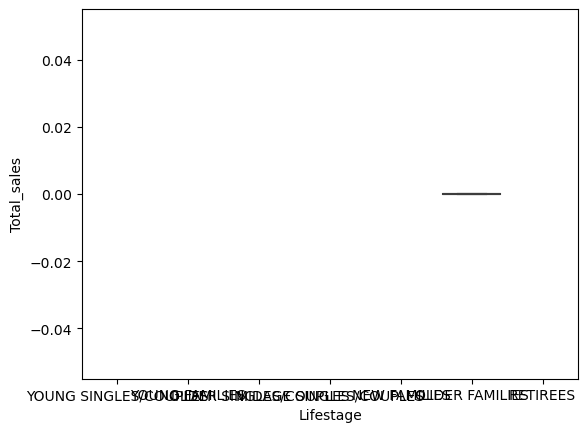

In [36]:
import seaborn as sns
sns.boxplot(x='Lifestage', y='Total_sales', data=customer360)


In [ ]:
#Q. Is there any relationship between 'Life Stage' variable & 'Customer_Segment' variable?

In [37]:
pd.crosstab(customer360['Lifestage'], customer360['Customer_Segment'])

Customer_Segment
Lifestage


In [ ]:
#Q. Build Predictive Model to predict the sales using 'customer360' file.  
#Find the key drivers of sales (variables that are influencing sales)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

X = customer360.drop(['Total_sales', 'Customer_Segment'], axis=1)
y = customer360['Total_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

# feature importance
importance = model.coef_
print("Feature Importance:")
print(importance)

# significant variables
significant_vars = X.columns[importance!= 0]
print("Significant Variables:")
print(significant)

ValueError: Input contains NaN